In [ ]:
#one way anova
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Book1.csv')


overall_mean = sum(df['PRODUCTIVITY_SCORE']) / len(df['PRODUCTIVITY_SCORE'])


SSB = 0
unique_locations = df['LOCATION'].unique()
for location in unique_locations:
    group_data = df[df['LOCATION'] == location]['PRODUCTIVITY_SCORE']
    group_mean = sum(group_data) / len(group_data)
    SSB += len(group_data) * (group_mean - overall_mean)**2

SSW = 0
for location in unique_locations:
    group_data = df[df['LOCATION'] == location]['PRODUCTIVITY_SCORE']
    group_mean = sum(group_data) / len(group_data)
    for value in group_data:
        SSW += (value - group_mean)**2


df_between = len(unique_locations) - 1
df_within = len(df) - len(unique_locations)

MSB = SSB / df_between
MSW = SSW / df_within


F_statistic = MSB / MSW

alpha = 0.05
f_critical = 4.74


print(f"SSB: {SSB}")
print(f"SSW: {SSW}")
print(f"Degrees of Freedom Between: {df_between}")
print(f"Degrees of Freedom Within: {df_within}")
print(f"MSB: {MSB}")
print(f"MSW: {MSW}")
print(f"F-statistic: {F_statistic}")
print(f"Critical F-value: {f_critical}")

if F_statistic > f_critical:
    print("Reject the null hypothesis: There are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the group means.")

SSB: 1610.1111111111118
SSW: 645.6666666666667
Degrees of Freedom Between: 2
Degrees of Freedom Within: 15
MSB: 805.0555555555559
MSW: 43.04444444444445
F-statistic: 18.702891068662886
Critical F-value: 4.74
Reject the null hypothesis: There are significant differences between the group means.


In [ ]:
#two-way anova
import pandas as pd
import scipy.stats as stats


df = pd.read_csv('/content/data2.csv')

group_means = df.groupby(['TEACHING_METHOD', 'STUDY_HOURS'])['TEST_SCORE'].mean()

overall_mean = df['TEST_SCORE'].mean()


SS_A = sum(len(df[df['TEACHING_METHOD'] == method]) * (mean - overall_mean)**2
           for method, mean in group_means.groupby(level=0).mean().items())

SS_B = sum(len(df[df['STUDY_HOURS'] == hours]) * (mean - overall_mean)**2
           for hours, mean in group_means.groupby(level=1).mean().items())

SS_AB = sum(len(df[(df[ 'TEACHING_METHOD'] == method) & (df['STUDY_HOURS'] == hours)]) *
            (mean - group_means[method, hours])**2
            for (method, hours), mean in group_means.items())

SS_W = sum((value - group_means[method, hours])**2
           for (method, hours), values in df.groupby(['TEACHING_METHOD', 'STUDY_HOURS'])['TEST_SCORE']
           for value in values)

df_A = len(df['TEACHING_METHOD'].unique()) - 1
df_B = len(df['STUDY_HOURS'].unique()) - 1
df_AB = df_A * df_B
df_within = len(df) - (len(df['TEACHING_METHOD'].unique()) * len(df['STUDY_HOURS'].unique()))  # Within groups degrees of freedom

MS_A = SS_A / df_A
MS_B = SS_B / df_B
MS_AB = SS_AB / df_AB
MS_W = SS_W / df_within
F_A = MS_A / MS_W
F_B = MS_B / MS_W
F_AB = MS_AB / MS_W

p_A = stats.f.sf(F_A, df_A, df_within)
p_B = stats.f.sf(F_B, df_B, df_within)
p_AB = stats.f.sf(F_AB, df_AB, df_within)

alpha = 0.05

print(f"F-statistic for Factor A (Teaching Method): {F_A}, p-value: {p_A}")
print(f"F-statistic for Factor B (Study Hours): {F_B}, p-value: {p_B}")
print(f"F-statistic for Interaction (Teaching Method * Study Hours): {F_AB}, p-value: {p_AB}")

if p_A < alpha:
    print("Reject the null hypothesis for Factor A (Teaching Method). There is a significant effect of Teaching Method.")
else:
    print("Fail to reject the null hypothesis for Factor A. There is no significant effect of Teaching Method.")

if p_B < alpha:
    print("Reject the null hypothesis for Factor B (Study Hours). There is a significant effect of Study Hours.")
else:
    print("Fail to reject the null hypothesis for Factor B. There is no significant effect of Study Hours.")

if p_AB < alpha:
    print("Reject the null hypothesis for Interaction. There is a significant interaction between Teaching Method and Study Hours.")
else:
    print("Fail to reject the null hypothesis for Interaction. There is no significant interaction.")



F-statistic for Factor A (Teaching Method): 13.473684210526294, p-value: 0.010446142300590787
F-statistic for Factor B (Study Hours): 101.61842105263159, p-value: 2.3579754580965413e-05
F-statistic for Interaction (Teaching Method * Study Hours): 0.0, p-value: 1.0
Reject the null hypothesis for Factor A (Teaching Method). There is a significant effect of Teaching Method.
Reject the null hypothesis for Factor B (Study Hours). There is a significant effect of Study Hours.
Fail to reject the null hypothesis for Interaction. There is no significant interaction.


In [ ]:
#correlation ,mean_vector,covarience matrix
import pandas as pd

dataset_path = input("Enter the path to your dataset file: ")
df = pd.read_csv(' /content/new.csv')
features = ['feature1', 'feature2', 'feature3']

def calculate_mean_vector(data, features):
  mean_vector = {}
  for feature in features:
    mean_vector[feature] = sum(data[feature]) / len(data[feature])
  return mean_vector
mean_vector = calculate_mean_vector(df, features)
print("Mean Vector:", mean_vector)

def calculate_covariance_matrix(data, features, mean_vector):
  num_features = len(features)
  covariance_matrix = [[0] * num_features for _ in range(num_features)]
  for i in range(num_features):
    for j in range(num_features):
      feature1 = features[i]
      feature2 = features[j]
      covariance = sum([(data[feature1][k] - mean_vector[feature1]) * (data[feature2][k] - mean_vector[feature2])
                        for k in range(len(data[feature1]))]) / (len(data[feature1]) - 1)
      covariance_matrix[i][j] = covariance
  return covariance_matrix
covariance_matrix = calculate_covariance_matrix(df, features, mean_vector)
print("\nCovariance Matrix:", covariance_matrix)

def calculate_correlation_matrix(data, features, covariance_matrix):
  num_features = len(features)
  correlation_matrix = [[0] * num_features for _ in range(num_features)]
  for i in range(num_features):
    for j in range(num_features):
      feature1 = features[i]
      feature2 = features[j]
      variance_feature1 = covariance_matrix[i][i]
      variance_feature2 = covariance_matrix[j][j]
      if variance_feature1 == 0 or variance_feature2 == 0:  # Handle zero variance
        correlation = 0
      else:
        correlation = covariance_matrix[i][j] / (variance_feature1 * variance_feature2)**0.5

      correlation_matrix[i][j] = correlation
  return correlation_matrix

correlation_matrix = calculate_correlation_matrix(df, features, covariance_matrix)
print("\nCorrelation Matrix:", correlation_matrix)


Enter the path to your dataset file: /content/new.csv
Mean Vector: {'feature1': 6.466666666666667, 'feature2': 4.466666666666667, 'feature3': 6.933333333333334}

Covariance Matrix: [[1.5523809523809522, 0.40952380952380957, 0.1761904761904761], [0.40952380952380957, 1.980952380952381, 0.1761904761904761], [0.1761904761904761, 0.1761904761904761, 1.6380952380952387]]

Correlation Matrix: [[1.0, 0.23353016485078243, 0.1104876414096433], [0.23353016485078243, 1.0, 0.0978083285887443], [0.1104876414096433, 0.0978083285887443, 1.0]]


In [ ]:
#t-test
# T-Test
import scipy.stats as stats
import numpy as np
import pandas as pd

# Input for T-Test type
i = int(input("Enter the type of T-Test:\n1. One Sample\n2. Paired\n3.Unpaired\n"))

# Input file path
file_path = input("Enter the file path: ")
df = pd.read_csv(file_path)

match i:
    case 1:
        # One Sample T-Test
        print("One Sample T-Test")
        column_name = input("Enter the column name: ")
        pop_mean = float(input("Enter the population mean: "))
        mean = df[column_name].mean()
        std = df[column_name].std()
        n = len(df[column_name])
        degree_freedom = n - 1
        t_statistic = (mean - pop_mean) / (std / np.sqrt(n))
        significance = float(input("Enter significance level [0-1]: "))
        t_critical = stats.t.ppf(1 - significance / 2, degree_freedom)
        if abs(t_statistic) > t_critical:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")
    case 2:
        # Paired T-Test
        print("Paired T-Test")
        column_name1 = input("Enter the first column name: ")
        column_name2 = input("Enter the second column name: ")
        difference = df[column_name1] - df[column_name2]
        mean = difference.mean()
        std = difference.std()
        n = len(difference)
        degree_freedom = n - 1
        t_statistic = mean / (std / np.sqrt(n))
        significance = float(input("Enter significance level [0-1]: "))
        t_critical = stats.t.ppf(1 - significance / 2, degree_freedom)
        if abs(t_statistic) > t_critical:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")
    case 3:
        # Unpaired T-Test
        print("Unpaired T-Test")
        column_name1 = input("Enter the first column name: ")
        column_name2 = input("Enter the second column name: ")
        mean_1 = df[column_name1].mean()
        mean_2 = df[column_name2].mean()
        std_1 = df[column_name1].std()
        std_2 = df[column_name2].std()
        n_1 = len(df[column_name1])
        n_2 = len(df[column_name2])
        equal_var = input("Assume equal variances? (yes/no): ").strip().lower() == "yes"
        significance = float(input("Enter significance level [0-1]: "))
        if equal_var:
            degree_freedom = n_1 + n_2 - 2
            std_pool = np.sqrt(((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2) / degree_freedom)
            t_statistic = (mean_1 - mean_2) / (std_pool * np.sqrt(1 / n_1 + 1 / n_2))
        else:
            numerator = (std_1**2 / n_1 + std_2**2 / n_2) ** 2
            denominator = ((std_1**2 / n_1)**2 / (n_1 - 1)) + ((std_2**2 / n_2)**2 / (n_2 - 1))
            degree_freedom = numerator / denominator
            t_statistic = (mean_1 - mean_2) / np.sqrt(std_1**2 / n_1 + std_2**2 / n_2)
        t_critical = stats.t.ppf(1 - significance / 2, degree_freedom)
        if abs(t_statistic) > t_critical:
            print("Reject the null hypothesis")
        else:
            print("Fail to reject the null hypothesis")
    case _:
        print("Incorrect Input")




#t-test

import pandas as pd
import numpy as np
import scipy.stats as stats

print("Choose one test:")
print("1. Paired test")
print("2. Unpaired test")
print("3. One-Sample test")
choice = int(input("Choose a t-test (1, 2, or 3) "))
#alpha 0.05
critical_values = {
    1: 12.706,
    2: 4.303,
    3: 3.182,
    4: 2.776,
    5: 2.571,
    6: 2.447,
    7: 2.365,
    8: 2.306,
    9: 2.262,
    10: 2.228,
}
match choice:
    case 1:
        print("Upload the dataset for the paired test:")
        df=pd.read_csv(input("Enter the path to your dataset file"))
        print(df)
        alpha=float(input("Enter the significance level (e.g, 0.05): "))
        data1=df.iloc[:,0]
        data2=df.iloc[:,1]
        diff=data1 - data2
        n=len(diff)
        t_statistic=np.mean(diff)/(np.std(diff, ddof=1)/np.sqrt(n))
        df_data=n-1

    case 2:
        print("Upload the datasets for the unpaired test")
        df1 = pd.read_csv(input("Enter the path to the first dataset file "))
        df2 = pd.read_csv(input("Enter the path to the second dataset file"))
        print("Dataset 1:", df1)
        print("Dataset 2:", df2)
        alpha = float(input("Enter the significance level (e.g, 0.05): "))
        data1 = df1.iloc[:, 0]
        data2 = df2.iloc[:, 0]
        n1 = len(data1)
        n2 = len(data2)
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        var1 = np.var(data1, ddof=1)
        var2 = np.var(data2, ddof=1)
        t_statistic = (mean1 - mean2)/np.sqrt((var1/n1)+(var2/n2))
        df_data = n1 + n2 - 2

    case 3:
        print("Upload the dataset for the one-sample test")
        df=pd.read_csv(input("Enter the path to your dataset file"))
        print(df)
        p_mean=float(input("Enter the population mean value: "))
        alpha=float(input("Enter the significance level (e.g, 0.05): "))
        data=df.iloc[:, 0]
        n=len(data)
        t_statistic=(np.mean(data)-p_mean)/(np.std(data, ddof=1)/np.sqrt(n))
        df_data=n - 1

    case _:
        print("Invalid input...Please enter 1, 2, or 3")
        exit()

t_crit = critical_values.get(df_data)

if t_crit is None:
    print("Degrees of freedom outside the range of the dictionary.")
else:
    print("Critical value retrieved from the dictionary",t_critic)

print("T-statistic:", t_statistic)
print("Critical Value:", t_crit)

if abs(t_statistic) > t_crit:
    print("Reject the null hypothesis H0")
else:
    print("Reject H1")

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/pca1.csv')

# Mean Vector Calculation
mean_vector = np.mean(data, axis=0)
print("Mean Vector: ", mean_vector)

# Number of data points
n = data.shape[0]

# Covariance Matrix Calculation (Manual)
cov_matrix_manual = np.zeros((data.shape[1], data.shape[1]))
data_array = data.to_numpy()
for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        cov_matrix_manual[i, j] = np.sum((data_array[:, i] - mean_vector[i]) * (data_array[:, j] - mean_vector[j])) / (n - 1)

print("Covariance Matrix (manual calculation): \n", cov_matrix_manual)

# Power Iteration Method for Eigenvalue and Eigenvector Calculation
def power_iteration(cov_matrix, num_iterations=1000):
    b = np.random.rand(cov_matrix.shape[1])
    b = b / np.linalg.norm(b)
    for _ in range(num_iterations):
        b_new = np.dot(cov_matrix, b)
        b_new = b_new / np.linalg.norm(b_new)
        b = b_new
    eigenvalue = np.dot(b.T, np.dot(cov_matrix, b))
    return eigenvalue, b

# Calculate Eigenvalues and Eigenvectors
eigenvalues = []
eigenvectors = []
cov_matrix_copy = cov_matrix_manual.copy()

for _ in range(data.shape[1]):
    eigenvalue, eigenvector = power_iteration(cov_matrix_copy)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)
    eigenvector = eigenvector.reshape(-1, 1)
    cov_matrix_copy = cov_matrix_copy - eigenvalue * np.dot(eigenvector, eigenvector.T)

eigenvalues = np.array(eigenvalues)
eigenvectors = np.array(eigenvectors).T
indices_sorted = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[indices_sorted]
sorted_eigenvectors = eigenvectors[:, indices_sorted]
k = 2
top_k_eigenvectors = sorted_eigenvectors[:, :k]
data_centered = data - mean_vector
pca_result = np.dot(data_centered, top_k_eigenvectors)
print("Eigenvalues (manual calculation):\n", sorted_eigenvalues)
print("Top-k Eigenvectors (manual calculation):\n", top_k_eigenvectors)
print("Projected Data (PCA result):\n", pca_result)


import numpy as np
import pandas as pd

# Load and center the data
data = pd.read_csv('/content/pca1.csv')
X = data - np.mean(data, axis=0)

# Covariance matrix
cov_matrix = np.cov(X.T)

# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# Sort by eigenvalue (descending)
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

# Project onto top-k components
k = 2
top_k_eig_vecs = eig_vecs[:, :k]
X_pca = X @ top_k_eig_vecs

# Output
print("Eigenvalues:\n", eig_vals)
print("Top-k Eigenvectors:\n", top_k_eig_vecs)
print("Projected Data (PCA result):\n", X_pca)
short version of pca

Mean Vector:  p1    6.2
p2    7.4
dtype: float64
Covariance Matrix (manual calculation): 
 [[ 8.2   9.15]
 [ 9.15 13.8 ]]
Eigenvalues (manual calculation):
 [20.5688296  1.4311704]
Top-k Eigenvectors (manual calculation):
 [[ 0.59471978 -0.80393307]
 [ 0.80393307  0.59471978]]
Projected Data (PCA result):
 [[-5.6496221  -1.44283405]
 [-3.02860959  1.73997814]
 [ 2.35678852 -0.49552788]
 [ 0.36341589  0.51761848]
 [ 5.95802729 -0.31923469]]


<ipython-input-11-15c9a9c5b2d3>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cov_matrix_manual[i, j] = np.sum((data_array[:, i] - mean_vector[i]) * (data_array[:, j] - mean_vector[j])) / (n - 1)


In [ ]:
import pandas as pd

def get_unique_items(transactions):
    unique_items = set()
    for transaction in transactions:
        for item in transaction:
            if item != 'Transaction ID' and transaction[item] == 1:
                unique_items.add(item)
    return list(unique_items)

def generate_itemsets(items, length):
    itemsets = []
    def generate_combinations(current, remaining, depth):
        if depth == 0:
            itemsets.append(tuple(current))
            return
        for i in range(len(remaining)):
            generate_combinations(current + [remaining[i]], remaining[i + 1:], depth - 1)
    generate_combinations([], items, length)
    return itemsets

def calculate_support(itemset, transactions):
    count = sum(1 for transaction in transactions if all(transaction[item] == 1 for item in itemset))
    return count / len(transactions)

def calculate_confidence(support_A, support_AB):
    return support_AB / support_A if support_A > 0 else 0

def calculate_lift(support_A, support_B, support_AB):
    return support_AB / (support_A * support_B) if support_A * support_B > 0 else 0

def apriori_algorithm(transactions, min_support):
    unique_items = get_unique_items(transactions)
    current_itemsets = [(item,) for item in unique_items]
    frequent_itemsets = []

    k = 1
    while current_itemsets:
        valid_itemsets = []
        for itemset in current_itemsets:
            support = calculate_support(itemset, transactions)
            if support >= min_support:
                frequent_itemsets.append((itemset, support))
                valid_itemsets.append(itemset)

        k += 1
        current_itemsets = generate_itemsets(unique_items, k)

    return frequent_itemsets

def generate_association_rules(frequent_itemsets, transactions):
    rules = []
    for itemset, support_AB in frequent_itemsets:
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                antecedents = generate_itemsets(list(itemset), i)
                for antecedent in antecedents:
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))
                   support_A = calculate_support(antecedent, transactions)
                    support_B = calculate_support(consequent, transactions)
                    confidence = calculate_confidence(support_A, support_AB)
                    lift = calculate_lift(support_A, support_B, support_AB)
                    rules.append((antecedent, consequent, support_AB, confidence, lift))
    return rules

df = pd.read_csv("/content/market_basket.csv")
dataset = df.to_dict(orient='records')
min_support = float(input("Enter minimum support value: "))
frequent_itemsets = apriori_algorithm(dataset, min_support)

print("Frequent Itemsets:")
for itemset, support in frequent_itemsets:
    print(f"{itemset}: {support}")

association_rules = generate_association_rules(frequent_itemsets, dataset)
print("\nAssociation Rules:")
for antecedent, consequent, support_AB, confidence, lift in association_rules:
    print(f"{antecedent} -> {consequent} | Support: {support_AB:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")


# apriori
#add few print statements

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load the CSV file
df = pd.read_csv('market_basket.csv')

# Step 2: Drop 'Transaction ID' column
df_items = df.drop('Transaction ID', axis=1)

# Step 3: Apply Apriori
frequent_itemsets = apriori(df_items, min_support=0.3, use_colnames=True)

# Step 4: Generate rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Step 5: Display
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Enter minimum support value: 0.1
Frequent Itemsets:

Association Rules:


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_csv('/content/marks.csv')

new_point = [3.8, 68]

def euclidean_distance(point1, point2):
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def manhattan_distance(point1, point2):
    return abs(point2[0] - point1[0]) + abs(point2[1] - point1[1])

def knn_classify(new_point, data, k=3, distance_func=euclidean_distance):
    distances = []

    for index, row in data.iterrows():
        study_hours = row['study_hour']
        exam_score = row['exam_score']
        class_label = row['class(1=pass,0=fail)']
        dist = distance_func(new_point, [study_hours, exam_score])
        distances.append((dist, class_label))

    distances.sort(key=lambda x: x[0])

    nearest_neighbors = distances[:k]

    nearest_classes = [neighbor[1] for neighbor in nearest_neighbors]

    most_common_class = Counter(nearest_classes).most_common(1)[0][0]

    return most_common_class

classification_euclidean = knn_classify(new_point, data, k=3, distance_func=euclidean_distance)
classification_manhattan = knn_classify(new_point, data, k=3, distance_func=manhattan_distance)

print(f"The new point {new_point} is classified as (Euclidean distance): {classification_euclidean}")
print(f"The new point {new_point} is classified as (Manhattan distance): {classification_manhattan}")


# KNN

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv("your_dataset.csv")

X = df.iloc[:, :-1].values  # all columns except last
y = df.iloc[:, -1].values   # last column = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(X_train, y_train, x_input, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_input, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Prediction
k = 3

x_new = np.array([2.0, 1.5, 3.0])  # change as per your CSV features
custom_pred = knn_predict(X_train, y_train, x_new, k)
print("Prediction for", x_new, "is:", custom_pred)

The new point [3.8, 68] is classified as (Euclidean distance): 1
The new point [3.8, 68] is classified as (Manhattan distance): 1


In [ ]:

import pandas as pd
from collections import Counter

data = pd.read_csv('/content/Bayes_Classifier_dataset1_from_class.csv')

P_yes = len(data[data['Buy Product'] == 'Yes']) / len(data)
P_no = len(data[data['Buy Product'] == 'No']) / len(data)

weather_given_yes = data[data['Buy Product'] == 'Yes']['Weather'].value_counts() / len(data[data['Buy Product'] == 'Yes'])
weather_given_no = data[data['Buy Product'] == 'No']['Weather'].value_counts() / len(data[data['Buy Product'] == 'No'])

def predict(weather):
    P_yes_given_weather = weather_given_yes.get(weather, 0) * P_yes
    P_no_given_weather = weather_given_no.get(weather, 0) * P_no

    P_weather = P_yes_given_weather + P_no_given_weather

    P_yes_given_weather /= P_weather if P_weather > 0 else 1
    P_no_given_weather /= P_weather if P_weather > 0 else 1

    if P_yes_given_weather > P_no_given_weather:
        return 'Yes'
    else:
        return 'No'

weather_input = 'Sunny'
prediction = predict(weather_input)
print(f"Prediction for weather '{weather_input}': {prediction}")

Prediction for weather 'Sunny': Yes


<ipython-input-11-58d2fc6ee733>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


<Figure size 1500x1000 with 0 Axes>

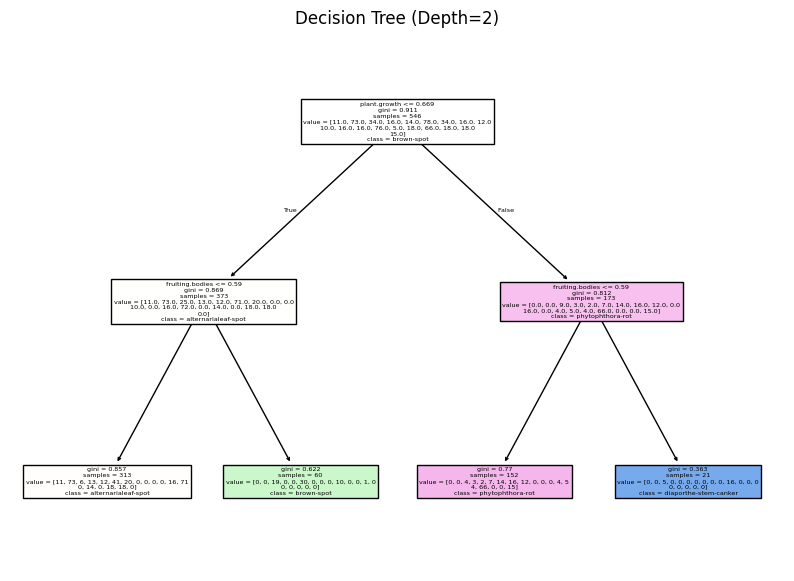

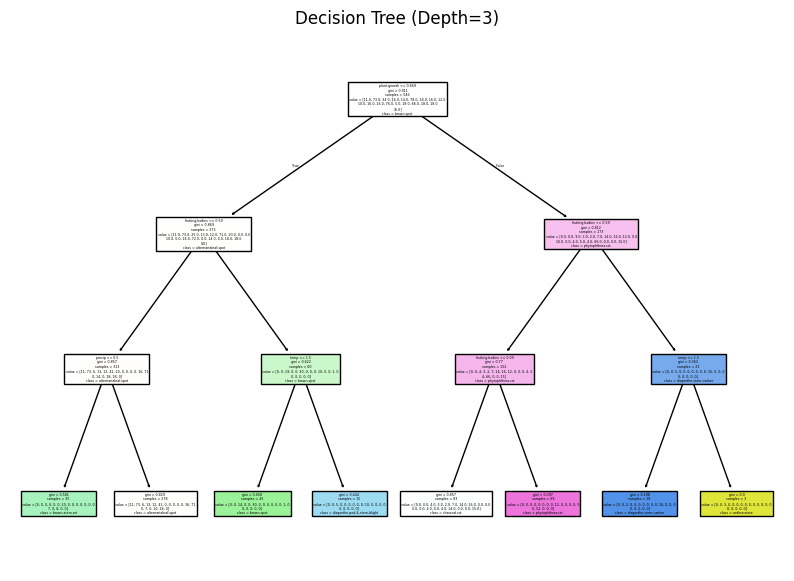

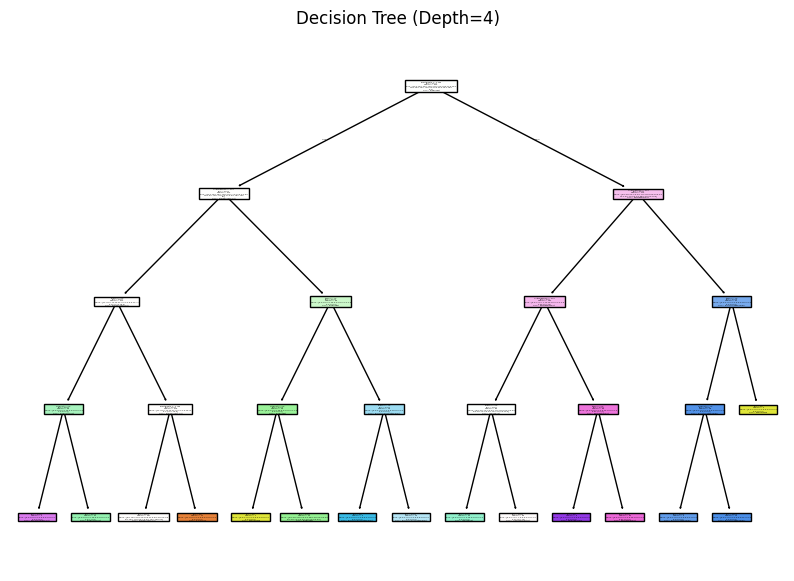

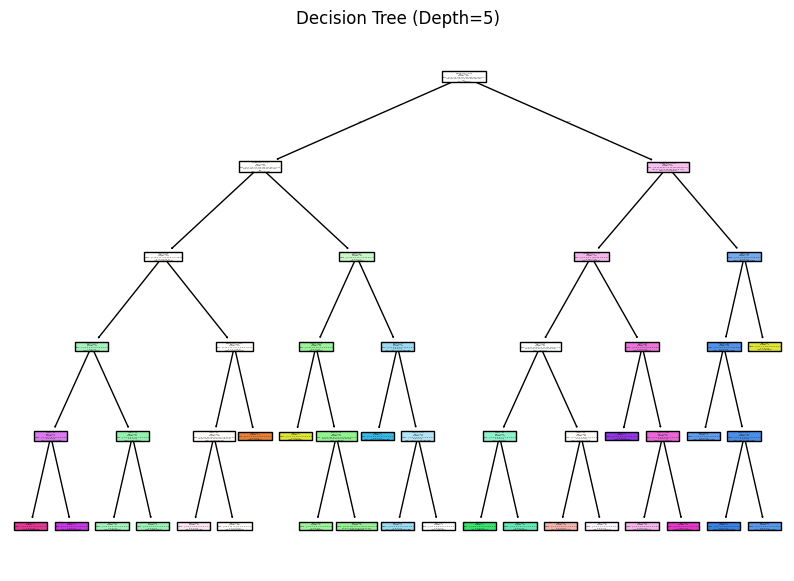

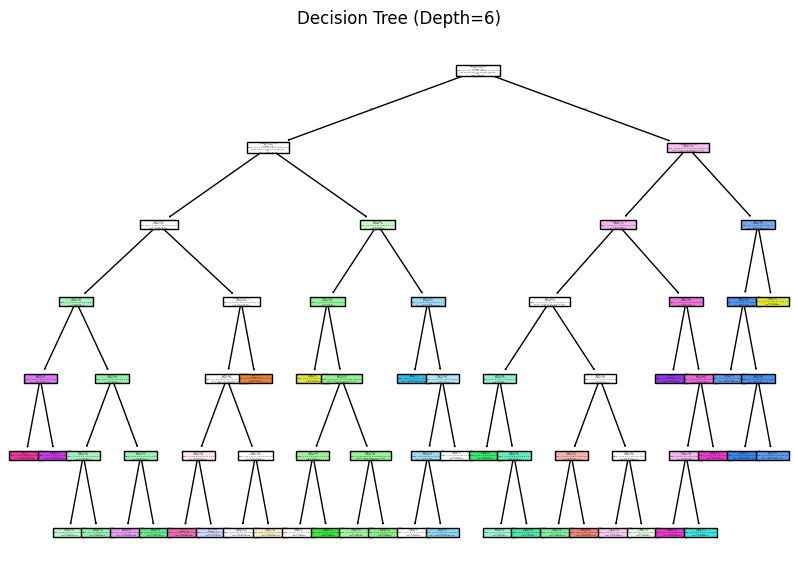

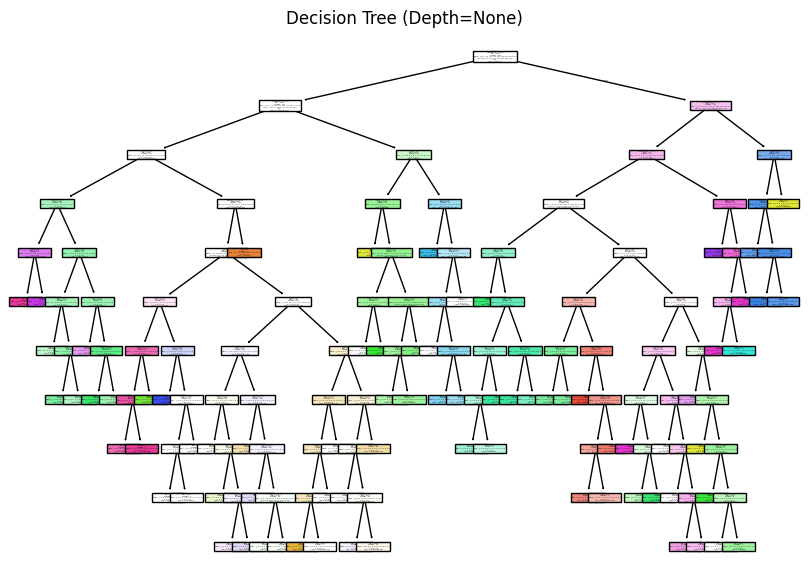

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Soybean.csv')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

selected_cols = ['Class', 'date', 'plant.stand', 'precip', 'temp', 'crop.hist',
                 'area.dam', 'sever', 'seed.tmt', 'germ', 'plant.growth', 'leaf.halo',
                 'leaf.marg', 'leaf.size', 'stem', 'lodging', 'stem.cankers',
                 'fruiting.bodies', 'ext.decay', 'int.discolor', 'fruit.spots', 'seed.discolor']
df_refined = df_cleaned[selected_cols]


selected_features = ['fruiting.bodies', 'precip', 'temp', 'crop.hist', 'plant.growth']
X = df_refined[selected_features]
y = df_refined['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 10))
for i, depth in enumerate([2, 3, 4, 5, 6, None], 1):
    plt.figure(figsize=(10, 7))  # Create a new figure for each tree
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    tree.plot_tree(clf, feature_names=selected_features, class_names=sorted(y.unique()), filled=True)
    plt.title(f"Decision Tree (Depth={depth})")
    plt.show()


<ipython-input-13-189510879ba4>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)


<Figure size 1500x1000 with 0 Axes>

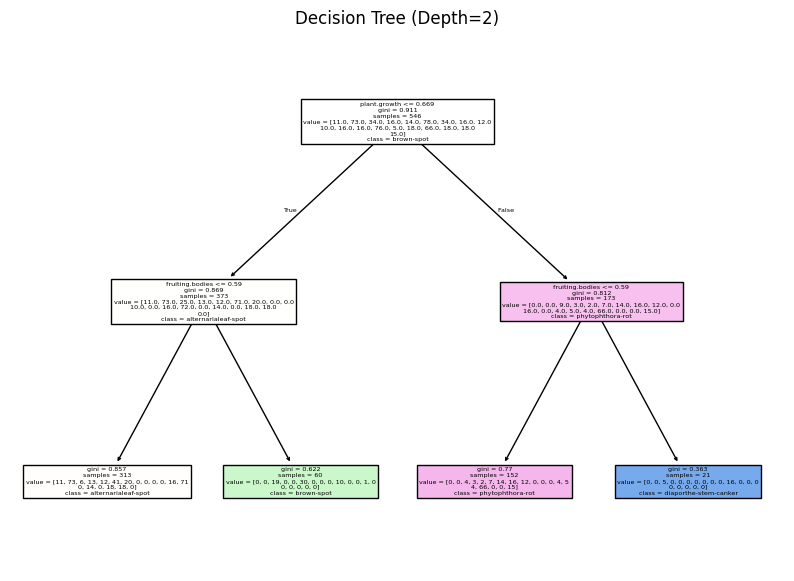

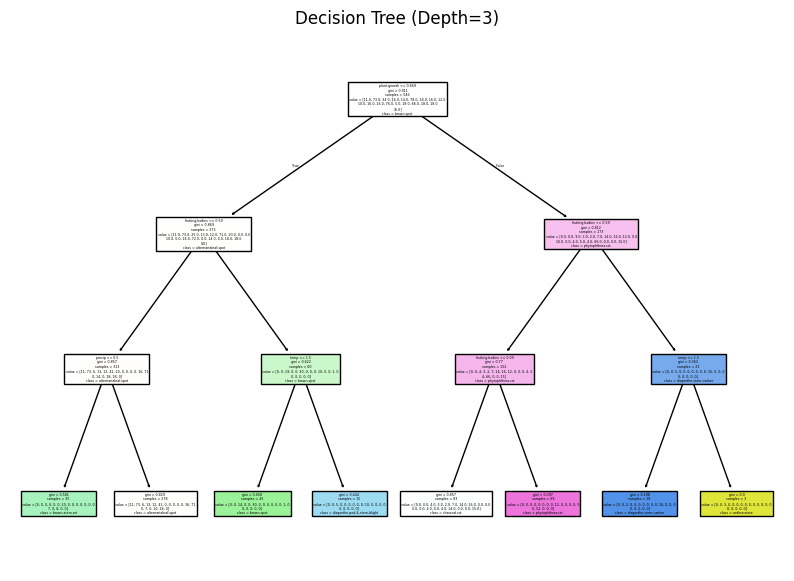

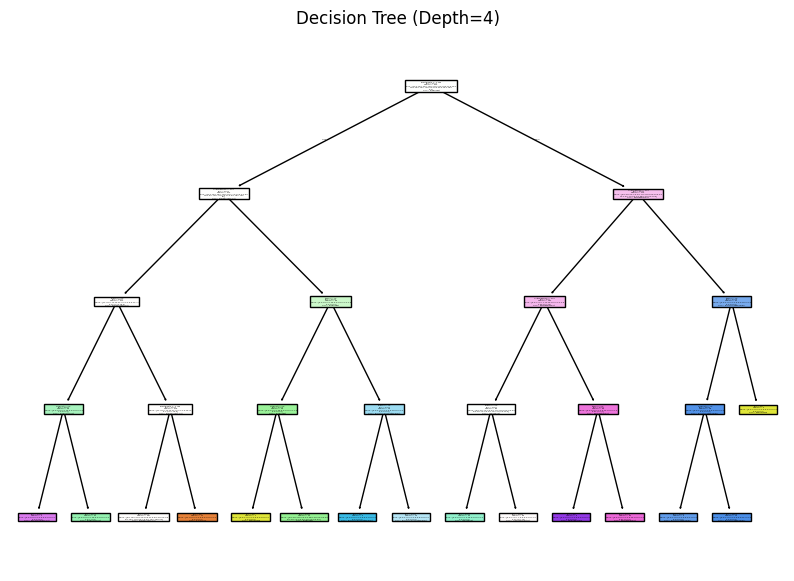

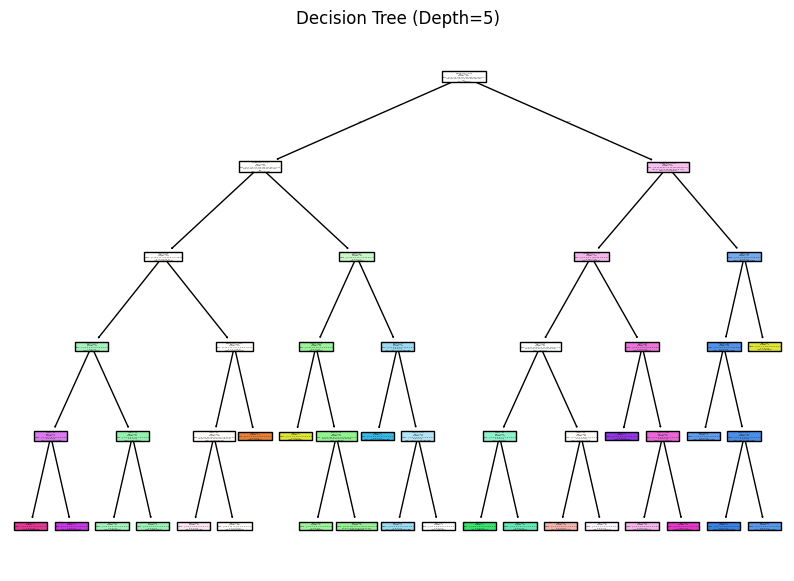

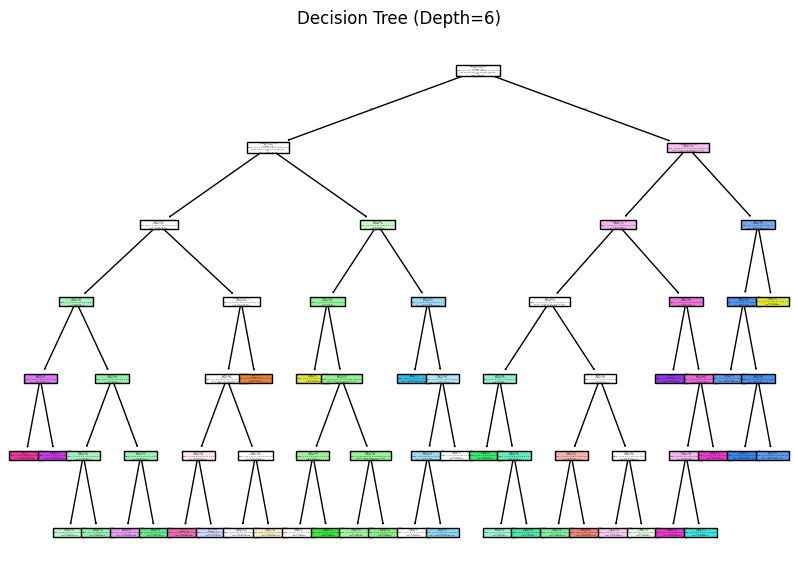

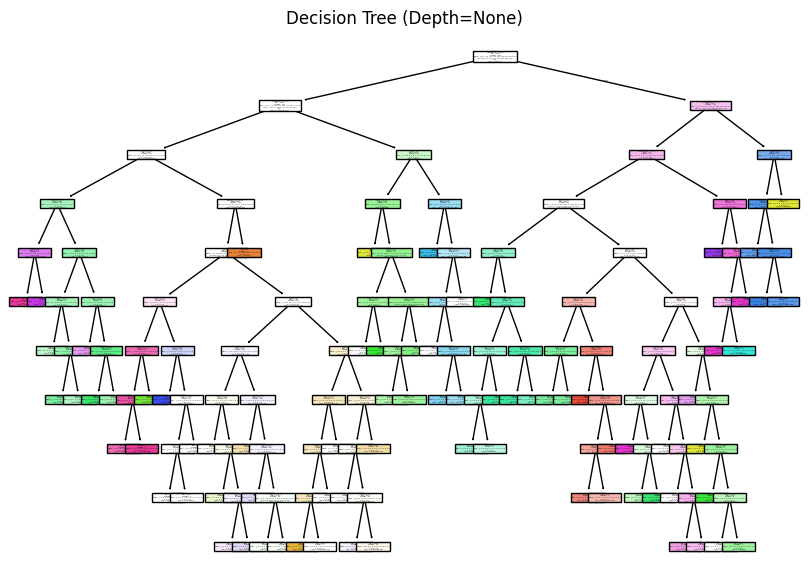

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Soybean.csv')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = df.copy()
for col in numeric_cols:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

selected_cols = ['Class', 'date', 'plant.stand', 'precip', 'temp', 'crop.hist',
                 'area.dam', 'sever', 'seed.tmt', 'germ', 'plant.growth', 'leaf.halo',
                 'leaf.marg', 'leaf.size', 'stem', 'lodging', 'stem.cankers',
                 'fruiting.bodies', 'ext.decay', 'int.discolor', 'fruit.spots', 'seed.discolor']
df_refined = df_cleaned[selected_cols]

selected_features = ['fruiting.bodies', 'precip', 'temp', 'crop.hist', 'plant.growth']
X = df_refined[selected_features]
y = df_refined['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(15, 10))
for i, depth in enumerate([2, 3, 4, 5, 6, None], 1):
    plt.figure(figsize=(10, 7))  # Create a new figure for each tree
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    tree.plot_tree(clf, feature_names=selected_features, class_names=sorted(y.unique()), filled=True)
    plt.title(f"Decision Tree (Depth={depth})")
    plt.show()



In [ ]:
#Gaussian
import math
import pandas as pd

# Load dataset
data = pd.read_csv('/content/Gaussian_NB(dataset).csv')

# Print the column names to verify
print(data.columns)

# Extract the columns using the correct column name
study_hours = data['Study Hours']
sleep_hours = data['Sleep Hours']
class_labels = data['Class(pass=1,fail=0)']  # Corrected column name

# Prior probabilities (P(class=0) and P(class=1))
total_data_points = len(data)
class_0_count = (class_labels == 0).sum()
class_1_count = total_data_points - class_0_count

P_class_0 = class_0_count / total_data_points
P_class_1 = class_1_count / total_data_points

# Separate data by class
class_0_data = data[data['Class(pass=1,fail=0)'] == 0]
class_1_data = data[data['Class(pass=1,fail=0)'] == 1]

# Function to calculate mean and variance
def mean(data):
    return data.mean()

def variance(data, mean_value):
    return ((data - mean_value) ** 2).mean()

# For class 0 (Fail)
mean_study_0 = mean(class_0_data['Study Hours'])
var_study_0 = variance(class_0_data['Study Hours'], mean_study_0)

mean_sleep_0 = mean(class_0_data['Sleep Hours'])
var_sleep_0 = variance(class_0_data['Sleep Hours'], mean_sleep_0)

# For class 1 (Pass)
mean_study_1 = mean(class_1_data['Study Hours'])
var_study_1 = variance(class_1_data['Study Hours'], mean_study_1)

mean_sleep_1 = mean(class_1_data['Sleep Hours'])
var_sleep_1 = variance(class_1_data['Sleep Hours'], mean_sleep_1)

# Gaussian Probability Density Function (PDF)
def gaussian_pdf(x, mean_value, var_value):
    return (1 / math.sqrt(2 * math.pi * var_value)) * math.exp(-((x - mean_value) ** 2) / (2 * var_value))

# New data point
x_test = 4.3  # Study Hours
y_test = 3.2  # Sleep Hours

# Compute likelihood for class 0 (Fail)
P_x_given_class_0 = gaussian_pdf(x_test, mean_study_0, var_study_0) * gaussian_pdf(y_test, mean_sleep_0, var_sleep_0)

# Compute likelihood for class 1 (Pass)
P_x_given_class_1 = gaussian_pdf(x_test, mean_study_1, var_study_1) * gaussian_pdf(y_test, mean_sleep_1, var_sleep_1)

# Compute posterior probabilities
P_class_0_given_x = P_class_0 * P_x_given_class_0
P_class_1_given_x = P_class_1 * P_x_given_class_1

# Compare the probabilities and predict
if P_class_1_given_x > P_class_0_given_x:
    prediction = 1  # Pass
else:
    prediction = 0  # Fail

# Print results
print(f"P(Class=0 | x={x_test}, y={y_test}) = {P_class_0_given_x}")
print(f"P(Class=1 | x={x_test}, y={y_test}) = {P_class_1_given_x}")
print(f"Predicted Class: {'Pass' if prediction == 1 else 'Fail'}")

Index(['Study Hours', 'Sleep Hours', 'Class(pass=1,fail=0)'], dtype='object')
P(Class=0 | x=4.3, y=3.2) = 0.00019883024472670761
P(Class=1 | x=4.3, y=3.2) = 7.561874062541819e-22
Predicted Class: Fail


In [ ]:
import math
import pandas as pd
import re

# Load dataset
messages = pd.read_csv('/content/multinomial_NB(dataset).csv', encoding='latin-1')

# Standardize column names
messages.columns = messages.columns.str.strip()

# Ensure correct column names
if 'SMS Message' not in messages.columns or 'Label' not in messages.columns:
    # Attempt renaming if needed
    messages.rename(columns={'v1': 'Label', 'v2': 'SMS Message'}, inplace=True)

if 'SMS Message' not in messages.columns or 'Label' not in messages.columns:
    raise KeyError("Column names should be 'SMS Message' and 'Label'. Please check your CSV file.")

# Standardize labels to match dictionary keys
messages['Label'] = messages['Label'].str.strip().str.title()  # Convert 'spam' -> 'Spam'

# Check unique label values
print("Unique Labels:", messages['Label'].unique())  # Should print ['Spam', 'Not Spam']

# Tokenization function
def tokenize(message):
    return re.findall(r'\b\w+\b', message.lower())  # Extract words properly

# Tokenize messages
tokenized_messages = [(tokenize(row['SMS Message']), row['Label']) for _, row in messages.iterrows()]

# Build vocabulary
vocabulary = set(word for msg, _ in tokenized_messages for word in msg)

# Initialize word counts with Laplace smoothing
word_counts = {"Spam": {}, "Not Spam": {}}
spam_count = sum(1 for _, label in tokenized_messages if label == "Spam")
not_spam_count = len(messages) - spam_count

# Initialize all word counts to 1 (Laplace smoothing)
for word in vocabulary:
    word_counts["Spam"][word] = 1
    word_counts["Not Spam"][word] = 1

# Track total word counts
spam_total_words = len(vocabulary)  # Start with vocab size due to smoothing
not_spam_total_words = len(vocabulary)  # Start with vocab size due to smoothing

# Populate word counts
for msg, label in tokenized_messages:
    if label not in word_counts:
        raise KeyError(f"Unexpected label found: {label}")  # Ensure no incorrect labels
    for word in msg:
        word_counts[label][word] += 1
        if label == "Spam":
            spam_total_words += 1
        else:
            not_spam_total_words += 1

# Compute prior probabilities
P_spam = spam_count / len(messages)
P_not_spam = not_spam_count / len(messages)

# Likelihood calculation with Laplace smoothing
def word_probability(word, label):
    return (word_counts[label].get(word, 1)) / (spam_total_words + len(vocabulary) if label == "Spam" else not_spam_total_words + len(vocabulary))

# Classify new message using logarithm to prevent underflow
def classify_message(message):
    test_tokens = tokenize(message)

    # Compute log probabilities
    P_x_given_spam = sum(math.log(word_probability(word, "Spam")) for word in test_tokens)
    P_x_given_not_spam = sum(math.log(word_probability(word, "Not Spam")) for word in test_tokens)

    # Compute final probabilities
    P_spam_given_x = math.log(P_spam) + P_x_given_spam
    P_not_spam_given_x = math.log(P_not_spam) + P_x_given_not_spam

    # Prediction
    return "Spam" if P_spam_given_x > P_not_spam_given_x else "Not Spam"

# Test the model
test_message = "Congratulations, you won a free gift!"
prediction = classify_message(test_message)

# Print results
print(f"Message: {test_message}")
print(f"Predicted Class: {prediction}")

Unique Labels: ['Spam' 'Not Spam']
Message: Congratulations, you won a free gift!
Predicted Class: Spam


In [ ]:
##Bernoulli
import pandas as pd

data = pd.read_csv('/content/Bernoulli_NB(dataset).csv')
data.columns = data.columns.str.strip()

features = ["Give birth", "Can fly", "Live in water", "Have legs"]
class_column = "Class"

mammal_count = sum(1 for _, row in data.iterrows() if row[class_column].strip().lower() == "mammal")
non_mammal_count = len(data) - mammal_count
total_count = len(data)

P_mammal = mammal_count / total_count
P_non_mammal = non_mammal_count / total_count

mammal_features = {feature: 1 for feature in features}
non_mammal_features = {feature: 1 for feature in features}
mammal_total = 2
non_mammal_total = 2

for _, row in data.iterrows():
    for feature in features:
        if row[class_column].strip().lower() == "mammal":
            if row[feature].strip().lower() == "yes":
                mammal_features[feature] += 1
            mammal_total += 1
        else:
            if row[feature].strip().lower() == "yes":
                non_mammal_features[feature] += 1
            non_mammal_total += 1

P_feature_given_mammal = {feature: mammal_features[feature] / mammal_total for feature in features}
P_feature_given_non_mammal = {feature: non_mammal_features[feature] / non_mammal_total for feature in features}

test_sample = {"Give birth": "yes", "Can fly": "no", "Live in water": "no", "Have legs": "no"}

P_x_given_mammal = 1
P_x_given_non_mammal = 1

for feature, value in test_sample.items():
    if value.strip().lower() == "yes":
        P_x_given_mammal *= P_feature_given_mammal[feature]
        P_x_given_non_mammal *= P_feature_given_non_mammal[feature]
    else:
        P_x_given_mammal *= (1 - P_feature_given_mammal[feature])
        P_x_given_non_mammal *= (1 - P_feature_given_non_mammal[feature])

P_mammal_given_x = P_x_given_mammal * P_mammal
P_non_mammal_given_x = P_x_given_non_mammal * P_non_mammal

total_prob = P_mammal_given_x + P_non_mammal_given_x
P_mammal_given_x /= total_prob
P_non_mammal_given_x /= total_prob

prediction = "mammal" if P_mammal_given_x > P_non_mammal_given_x else "non-mammal"

print(f"\nTest Sample: {test_sample}")
print(f"P(Mammal | X) = {P_mammal_given_x}")
print(f"P(Non-Mammal | X) = {P_non_mammal_given_x}")
print(f"Predicted Class: {prediction}\n")



Test Sample: {'Give birth': 'yes', 'Can fly': 'no', 'Live in water': 'no', 'Have legs': 'no'}
P(Mammal | X) = 0.7276753603440254
P(Non-Mammal | X) = 0.2723246396559746
Predicted Class: mammal



In [ ]:
import pandas as pd

def get_dataset():
    df = pd.read_csv('/content/Smoothing.csv')
    column_name = input("\nEnter the column name to apply smoothing: ")
    return df[column_name].values

# Simple Exponential Smoothing Function with November & December Forecast
def simple_exponential_smoothing(data, alpha):
    smoothed = [data[0]]
    for t in range(1, len(data)):
        smoothed.append(alpha * data[t] + (1 - alpha) * smoothed[t - 1])

    xt_october = data[-1]
    st_minus_1 = smoothed[-1]
    forecast_november = alpha * xt_october + (1 - alpha) * st_minus_1
    forecast_december = alpha * forecast_november + (1 - alpha) * forecast_november

    return smoothed, forecast_november, forecast_december

# Double Exponential Smoothing (Holt’s Linear Trend Method)
def double_exponential_smoothing(data, alpha, beta):
    level = [data[0]]
    trend = [data[1] - data[0]]  # Initial trend
    smoothed = [data[0]]

    for t in range(1, len(data)):
        level.append(alpha * data[t] + (1 - alpha) * (level[t-1] + trend[t-1]))
        trend.append(beta * (level[t] - level[t-1]) + (1 - beta) * trend[t-1])
        smoothed.append(level[t] + trend[t])

    forecast_november = level[-1] + trend[-1]
    forecast_december = level[-1] + 2 * trend[-1]

    trend_november = trend[-1]
    trend_december = trend[-1]  # Assuming linear extension of trend

    return smoothed, forecast_november, forecast_december, trend_november, trend_december


# Main Program
if __name__ == "__main__":
    data = get_dataset()

    alpha = float(input("\nEnter alpha (smoothing factor, 0 < alpha < 1): "))
    beta = float(input("\nEnter beta (trend smoothing factor, 0 < beta < 1): "))


    # Apply smoothing and forecast for November & December
    ses_result, forecast_nov_ses, forecast_dec_ses = simple_exponential_smoothing(data, alpha)
    des_result, forecast_nov_des, forecast_dec_des, trend_nov_des, trend_dec_des = double_exponential_smoothing(data, alpha, beta)


    # Display Results
    print("\nSimple Exponential Smoothing (SES) Results:")
    print(f"Forecast for November: {forecast_nov_ses}")
    print(f"Forecast for December: {forecast_dec_ses}")

    print("\nDouble Exponential Smoothing (DES) Results:")
    print(f"Forecast for November: {forecast_nov_des}")
    print(f"Forecast for December: {forecast_dec_des}")
    print(f"Trend for November: {trend_nov_des}")
    print(f"Trend for December: {trend_dec_des}")





Enter the column name to apply smoothing: Sales

Enter alpha (smoothing factor, 0 < alpha < 1): 0.3

Enter beta (trend smoothing factor, 0 < beta < 1): 0.2

Simple Exponential Smoothing (SES) Results:
Forecast for November: 202.95490908099995
Forecast for December: 202.95490908099993

Double Exponential Smoothing (DES) Results:
Forecast for November: 231.54183794431998
Forecast for December: 245.55708712703998
Trend for November: 14.01524918272
Trend for December: 14.01524918272


In [ ]:
import pandas as pd
def get_dataset():
    df = pd.read_csv('/content/Triple_Smoothing.csv')
    column_name = input("\nEnter the column name to apply smoothing: ")
    return df[column_name].values
def triple_exponential_smoothing(data, alpha, beta, gamma, season_length=3):
    level = [data[0]]
    trend = [data[1] - data[0]]
    season = [data[i] - data[i - season_length] if i >= season_length else 0 for i in range(len(data))]
    smoothed = [data[0]]

    for t in range(1, len(data)):
        level.append(alpha * (data[t] - season[t % season_length]) + (1 - alpha) * (level[t-1] + trend[t-1]))
        trend.append(beta * (level[t] - level[t-1]) + (1 - beta) * trend[t-1])
        season.append(gamma * (data[t] - level[t]) + (1 - gamma) * season[t % season_length])
        smoothed.append(level[t] + trend[t] + season[t % season_length])

    forecast_november = level[-1] + trend[-1] + season[-season_length]
    forecast_december = level[-1] + 2 * trend[-1] + season[-(season_length-1)]

    return smoothed, forecast_november, forecast_december

if __name__ == "__main__":
    data = get_dataset()
    alpha = float(input("\nEnter alpha (smoothing factor, 0 < alpha < 1): "))
    beta = float(input("\nEnter beta (trend smoothing factor, 0 < beta < 1): "))
    gamma = float(input("\nEnter gamma (seasonal smoothing factor, 0 < gamma < 1): "))
    tes_result, forecast_nov_tes, forecast_dec_tes = triple_exponential_smoothing(data, alpha, beta, gamma)
    print("\nTriple Exponential Smoothing (TES) Results:")
    print(f"Forecast for November: {forecast_nov_tes}")
    print(f"Forecast for December: {forecast_dec_tes}")

In [ ]:
#SVM

import numpy as np

# Dataset
X = np.array([[2, 3], [1, 1], [2, 1], [5, 4], [6, 5], [7, 8]])
y = np.array([1, 1, 1, -1, -1, -1])  # Labels must be +1 or -1

# Hyperparameters
learning_rate = 0.001
lambda_param = 0.01
epochs = 1000

n_features = X.shape[1]
w = np.zeros(n_features)
b = 0

# Training using Gradient Descent
for epoch in range(epochs):
    for i, x_i in enumerate(X):
        condition = y[i] * (np.dot(w, x_i) + b) >= 1
        if condition:
            w -= learning_rate * (2 * lambda_param * w)
        else:
            w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y[i]))
            b -= learning_rate * y[i]

print("Weight vector:", w)
print("Bias:", b)

def predict(x):
    return 1 if np.dot(w, x) + b >= 0 else -1

# Test prediction
x_new = np.array([3, 3])
pred = predict(x_new)
print("Prediction for", x_new, ":", "Class +1" if pred == 1 else "Class -1")


In [ ]:
# smoothing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simple_exponential_smoothing(data, alpha):
    smoothed = np.zeros(len(data))
    smoothed[0] = data[0]

    for t in range(1, len(data)):
        smoothed[t] = alpha * data[t] + (1 - alpha) * smoothed[t - 1]

    next_forecast = alpha * data[-1] + (1 - alpha) * smoothed[-1]
    return smoothed, next_forecast

def double_exponential_smoothing(data, alpha, beta):
    smoothed = np.zeros(len(data) + 1)
    trend = np.zeros(len(data) + 1)

    smoothed[0] = data[0]
    trend[0] = data[1] - data[0]

    for t in range(1, len(data)):
        smoothed[t] = alpha * data[t] + (1 - alpha) * (smoothed[t-1] + trend[t-1])
        trend[t] = beta * (smoothed[t] - smoothed[t-1]) + (1 - beta) * trend[t-1]

    smoothed[-1] = smoothed[-2] + trend[-2]
    return smoothed[:-1], smoothed[-1]

def holt_winters_exponential_smoothing(data, alpha, beta, gamma, season_length):
    smoothed = np.zeros(len(data) + 1)
    trend = np.zeros(len(data) + 1)
    seasonal = np.ones(season_length)

    smoothed[0] = data[0]
    trend[0] = data[1] - data[0]

    for i in range(season_length):
        seasonal[i] = data[i] / smoothed[0]

    for t in range(1, len(data)):
        if t >= season_length:
            seasonal[t % season_length] = gamma * (data[t] / smoothed[t - 1]) + (1 - gamma) * seasonal[t % season_length]
        smoothed[t] = alpha * (data[t] / seasonal[t % season_length]) + (1 - alpha) * (smoothed[t - 1] + trend[t - 1])
        trend[t] = beta * (smoothed[t] - smoothed[t - 1]) + (1 - beta) * trend[t - 1]

    smoothed[-1] = (smoothed[-2] + trend[-2]) * seasonal[-1 % season_length]
    return smoothed[:-1], smoothed[-1]

smoothing_type = input("Enter smoothing type (simple/double/triple): ").strip().lower()
dataset_path = input("Enter dataset file path: ").strip()

data_df = pd.read_csv(dataset_path)
months = data_df['month']
sales = data_df['sales'].values

if(smoothing_type == "simple"):
   alpha = 0.3
elif(smoothing_type == "double"):
   alpha = 0.3
   beta = 0.2
elif(smoothing_type == "triple"):
   alpha = 0.5
   beta = 0.5
   gamma = 0.5
   season_length = 4

if smoothing_type == "simple":
    smoothed_sales, next_month_prediction = simple_exponential_smoothing(sales, alpha)
elif smoothing_type == "double":
    smoothed_sales, next_month_prediction = double_exponential_smoothing(sales, alpha, beta)
elif smoothing_type == "triple":
    smoothed_sales, next_month_prediction = holt_winters_exponential_smoothing(sales, alpha, beta, gamma, season_length)
else:
    raise ValueError("Invalid smoothing type! Choose from 'simple', 'double', or 'triple'.")

print(f"{smoothing_type.capitalize()} Exponential Smoothed Data:", smoothed_sales)
print("Predicted Sales for Next Month (Nov):", next_month_prediction)

plt.figure(figsize=(10,5))
plt.plot(months, sales, label='Original Data', marker='o')
plt.plot(months, smoothed_sales, label=f'{smoothing_type.capitalize()} Exponential Smoothing', linestyle='--', marker='s')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title(f'{smoothing_type.capitalize()} Exponential Smoothing')
plt.legend()
plt.xticks(rotation=45)

future_months = np.append(months, 'Nov')
future_sales = np.append(smoothed_sales, next_month_prediction)
plt.plot(future_months, future_sales, label='Forecast (Nov)', linestyle='dotted', marker='^', color='red')

plt.show()
